In [1]:
%run 01_common_functions.ipynb

### Load and preprocess data

In [6]:
def get_rca_data():

    symptoms_data = pd.read_csv("root_cause_analysis.csv")

    label_encoder = preprocessing.LabelEncoder()
    symptoms_data['ROOT_CAUSE'] = label_encoder.fit_transform(symptoms_data['ROOT_CAUSE'])

    symptoms_np = symptoms_data.to_numpy().astype(float)

    X = symptoms_np[:, 1:8]
    y = symptoms_np[:, 8]
    y = tf.keras.utils.to_categorical(y, 3)

    return X, y

 

## Tuning the network

### Layers in the netowrk

In [7]:
accuracy_measures = {}
layer_list = []

for layer_count in range(1,6):
    layer_list.append(32)

    model_config = base_model_config()
    X, y = get_rca_data()

    model_config['HIDDEN_NODES'] = layer_list
    model_name = "Layers-" + str(layer_count)
    history = create_and_run_model(model_config, X, y, model_name)

    accuracy_measures[model_name] = history.history["accuracy"]

Model: "Layers-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Output-Layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 355
Trainable params: 355
Non-trainable params: 0
_________________________________________________________________
Model: "Layers-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 32)                256       
                                                                 
 Dense-Layer-1 (Dense)       (None, 32)                1056      
                                                                 
 Output-Layer (Dense)        (None, 3)    

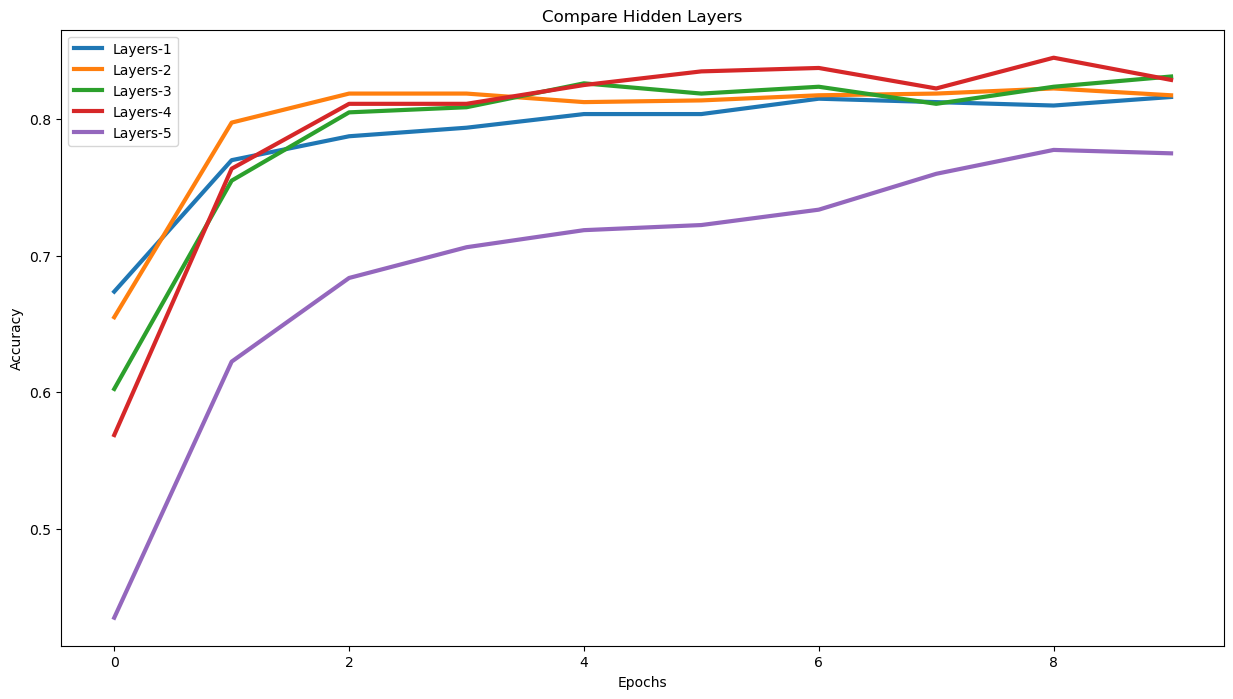

In [8]:
plot_graph(accuracy_measures, "Compare Hidden Layers")

### Nodes in a Layer

In [9]:
accuracy_measures = {}

node_increment = 8

for node_count in range(1,5):
    layer_list = []

    for layer_count in range(2):
        layer_list.append(node_count * node_increment)

    model_config = base_model_config()
    X, y = get_rca_data()

    model_config["HIDDEN_NODES"] = layer_list
    model_name = "Nodes-" + str(node_count * node_increment)
    history = create_and_run_model(model_config, X, y, model_name)

    accuracy_measures[model_name] = history.history["accuracy"]

Model: "Nodes-8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 8)                 64        
                                                                 
 Dense-Layer-1 (Dense)       (None, 8)                 72        
                                                                 
 Output-Layer (Dense)        (None, 3)                 27        
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________
Model: "Nodes-16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-Layer-0 (Dense)       (None, 16)                128       
                                                                 
 Dense-Layer-1 (Dense)       (None, 16)    

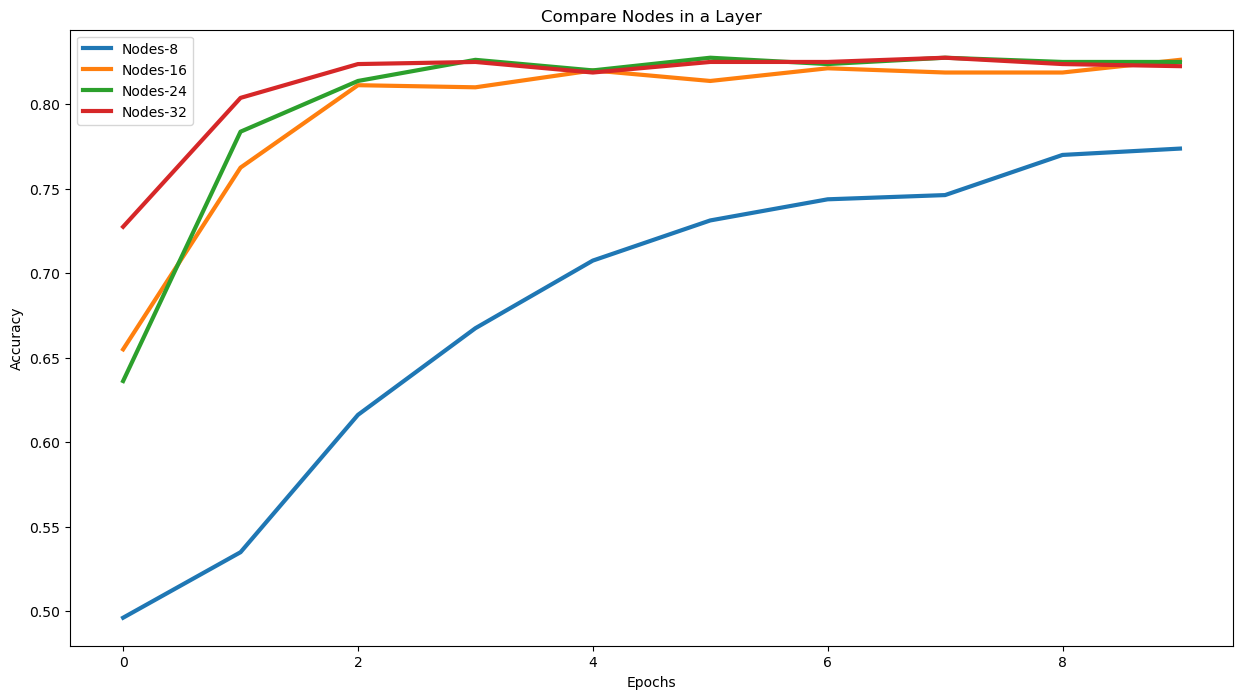

In [10]:
plot_graph(accuracy_measures, "Compare Nodes in a Layer")

## Tuning Back Propagation

### Optimizers